In [2]:
# visualization of perturbations
import matplotlib.pyplot as plt
from advertorch_examples.utils import _imshow
from data_loaders import get_cifar10_test_loader
import torch
import torch.nn as nn
from advertorch.attacks import LinfPGDAttack
from models import cifar10CNN
import os

use_cuda = torch.cuda.is_available()
device = torch.device("cuda:1" if use_cuda else "cpu")

clean = cifar10CNN()

# Load model from serialized file from training
clean.load_state_dict(
    torch.load(os.path.join('models/madry', 'cifar10_madryCNN_clntrained.pt')))
clean.to(device)

batch_size = 10
loader = get_cifar10_test_loader(batch_size=batch_size)
for cln_data, true_label in loader:
    break
cln_data, true_label = cln_data.to(device), true_label.to(device)

Files already downloaded and verified


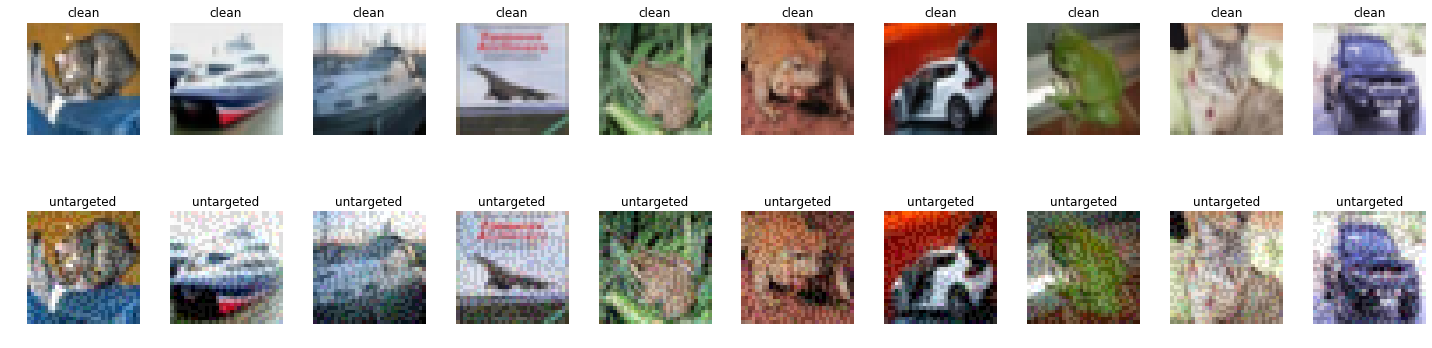

In [9]:
adversary = LinfPGDAttack(
                clean, loss_fn=nn.CrossEntropyLoss(reduction="sum"), 
                eps=0.06, nb_iter=10,
                eps_iter=2.0,
                rand_init=True, 
                clip_min=0.0, clip_max=1.0, targeted=False)
adv_untargeted = adversary.perturb(cln_data, true_label)
# target = torch.ones_like(true_label) * 3
# adversary.targeted = True
# adv_targeted = adversary.perturb(cln_data, target)

plt.figure(figsize=(20, 8))
for ii in range(batch_size):
    plt.subplot(3, batch_size, ii + 1)
    _imshow(cln_data[ii])
    plt.title("clean")
    plt.subplot(3, batch_size, ii + 1 + batch_size)
    _imshow(adv_untargeted[ii])
    plt.title("untargeted")
#     plt.subplot(3, batch_size, ii + 1 + batch_size * 2)
#     _imshow(adv_targeted[ii])
#     plt.title("targeted to 3")

plt.tight_layout()
plt.show()

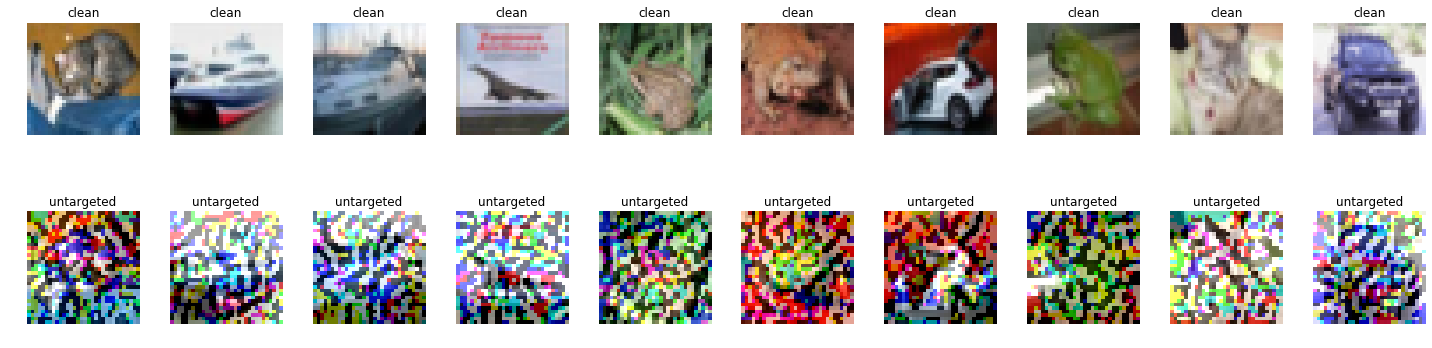

In [14]:
from advertorch.attacks import GradientSignAttack
adversary = GradientSignAttack(clean,loss_fn=nn.CrossEntropyLoss(),
                           clip_min=0.0, clip_max=1.0)
adv_untargeted = adversary.perturb(cln_data, true_label)
target = torch.ones_like(true_label) * 3
# adversary.targeted = True
# adv_targeted = adversary.perturb(cln_data, target)

plt.figure(figsize=(20, 8))
for ii in range(batch_size):
    plt.subplot(3, batch_size, ii + 1)
    _imshow(cln_data[ii])
    plt.title("clean")
    plt.subplot(3, batch_size, ii + 1 + batch_size)
    _imshow(adv_untargeted[ii])
    plt.title("untargeted")
#     plt.subplot(3, batch_size, ii + 1 + batch_size * 2)
#     _imshow(adv_targeted[ii])
#     plt.title("targeted to 3")

plt.tight_layout()
plt.show()

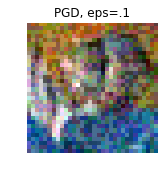

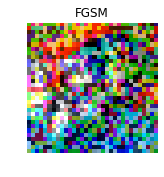

In [16]:
from advertorch.attacks import GradientSignAttack, LinfPGDAttack

def plot(adversary, attack):
    adv_untargeted = adversary.perturb(cln_data, true_label)
    
    plt.figure(figsize=(20, 8))
    for ii in range(1):
        plt.subplot(1, batch_size, ii+1)
        _imshow(cln_data[ii])
        plt.title("clean")
        _imshow(adv_untargeted[ii])
        plt.title(attack)
    #     plt.subplot(3, batch_size, ii + 1 + batch_size * 2)
    #     _imshow(adv_targeted[ii])
    #     plt.title("targeted to 3")

    plt.tight_layout()
    plt.show()
    
adversary = LinfPGDAttack(
                clean, loss_fn=nn.CrossEntropyLoss(reduction="sum"), 
                eps=.1, nb_iter=10,
                eps_iter=2.0,
                rand_init=True, 
                clip_min=0.0, clip_max=1.0, targeted=False)
plot(adversary, "PGD, eps=.1")

adversary = GradientSignAttack(clean,loss_fn=nn.CrossEntropyLoss(),
                           clip_min=0.0, clip_max=1.0)

plot(adversary, "FGSM")
